<a href="https://colab.research.google.com/github/suhanasulfi/sentiment-analysis-app/blob/main/Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Requirements**

In [ ]:
!pip install pandas numpy scikit-learn nltk matplotlib seaborn wordcloud plotly ipywidgets textblob


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.0 MB/s eta 0:00:00


In [ ]:
import nltk
nltk.download('all')



[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

# **Phase 1: Data Exploration**

In [ ]:
#installing required libraries
!pip install pandas numpy matplotlib seaborn


In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("📊 Sentiment Analysis Project - Data Exploration")
print("=" * 50)


📊 Sentiment Analysis Project - Data Exploration


In [ ]:
#loading the dataset
from google.colab import files
uploaded = files.upload()


Saving IMDB Datset.csv to IMDB Datset.csv


In [ ]:
df = pd.read_csv('IMDB Datset.csv')

print(f"📈 Dataset Shape: {df.shape}")
print(f"📋 Columns: {df.columns.tolist()}")
print(f"💾 Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n🔍 First 5 rows:")
display(df.head())

print(f"\n❓ Missing Values:")
print(df.isnull().sum())


📈 Dataset Shape: (50000, 2)
📋 Columns: ['review', 'sentiment']
💾 Memory Usage: 68.46 MB

🔍 First 5 rows:


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive



❓ Missing Values:
review       0
sentiment    0
dtype: int64


📊 Sentiment Distribution:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


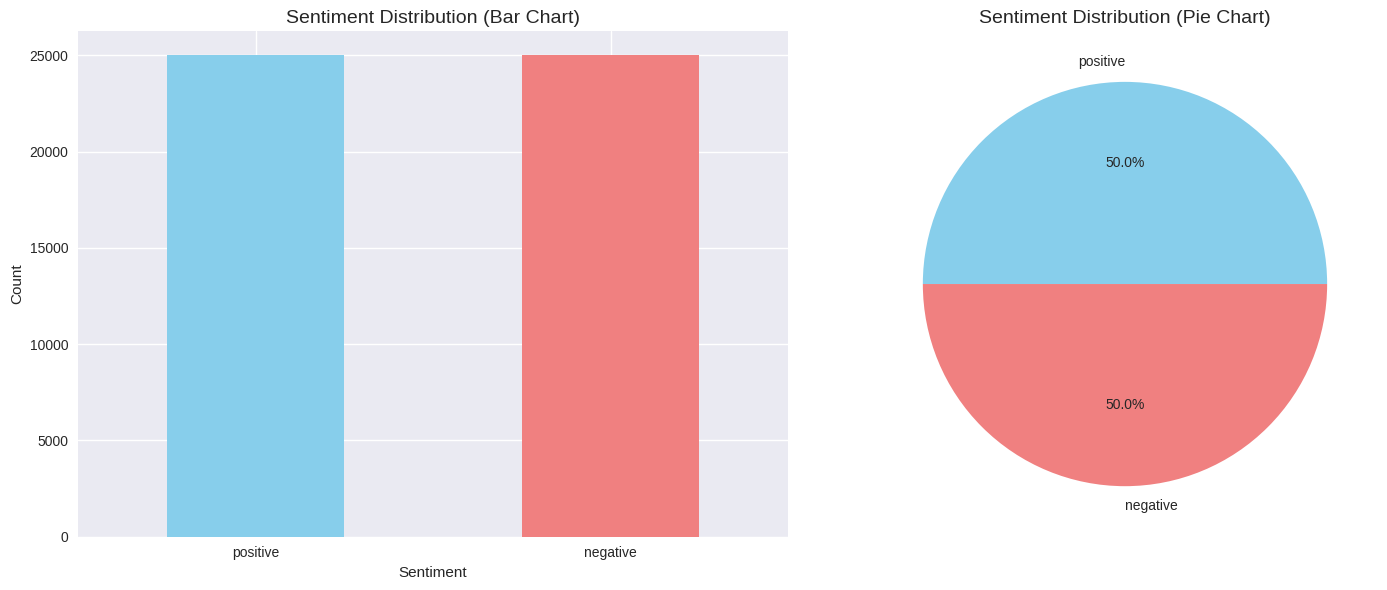

In [ ]:
#sentiment distribution visualization
sentiment_counts = df['sentiment'].value_counts()

print("📊 Sentiment Distribution:")
print(sentiment_counts)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Bar chart
sentiment_counts.plot(kind='bar', ax=ax1, color=['skyblue', 'lightcoral'])
ax1.set_title('Sentiment Distribution (Bar Chart)', fontsize=14)
ax1.set_xlabel('Sentiment')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=0)

# Pie chart
ax2.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%',
        colors=['skyblue', 'lightcoral'])
ax2.set_title('Sentiment Distribution (Pie Chart)', fontsize=14)

plt.tight_layout()
plt.show()


📏 Text Length Statistics by Sentiment:


review_length                                                        \
                  count        mean          std   min    25%    50%      75%   
sentiment                                                                       
negative        25000.0  1294.06436   945.892669  32.0  706.0  973.0  1567.25   
positive        25000.0  1324.79768  1031.492627  65.0  691.0  968.0  1614.00   

                   word_count                                             \
               max      count       mean         std   min    25%    50%   
sentiment                                                                  
negative    8969.0    25000.0  229.46456  164.947795   4.0  128.0  174.0   
positive   13704.0    25000.0  232.84932  177.497046  10.0  125.0  172.0   

                          
             75%     max  
sentiment                 
negative   278.0  1522.0  
positive   284.0  2470.0

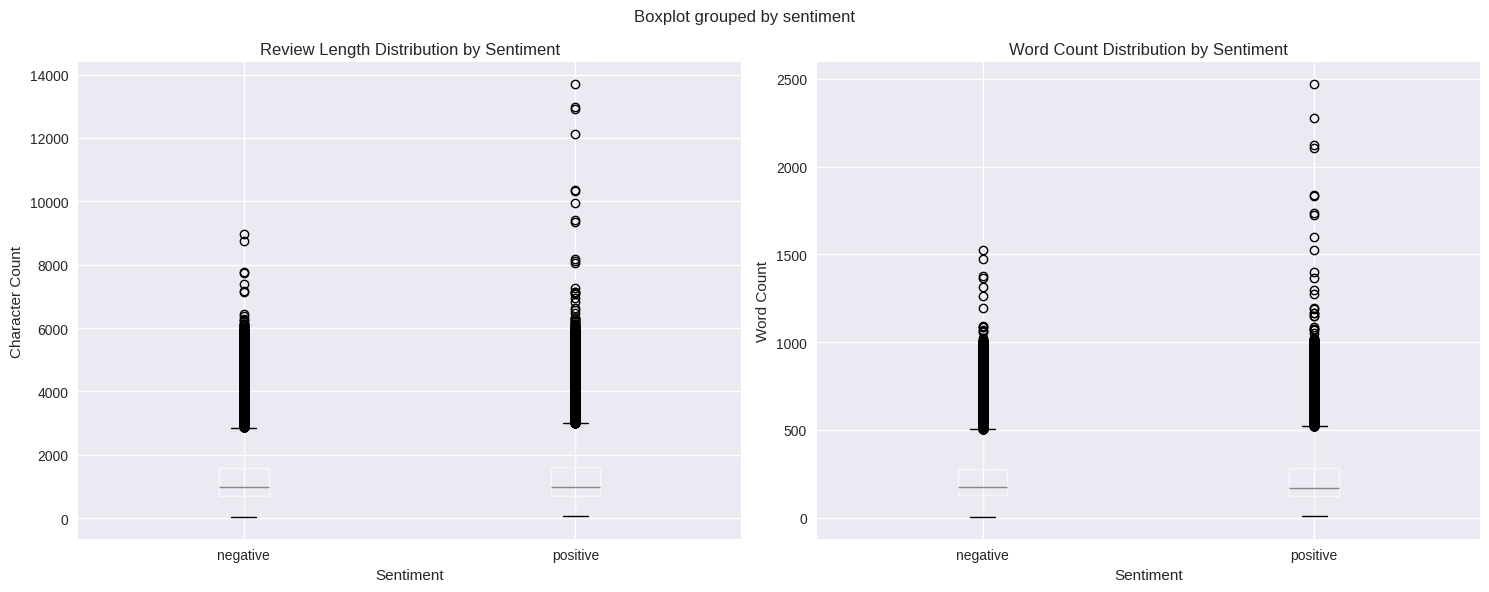

In [ ]:
#text length analysis
df['review_length'] = df['review'].str.len()
df['word_count'] = df['review'].str.split().str.len()

length_stats = df.groupby('sentiment')[['review_length', 'word_count']].describe()
print("📏 Text Length Statistics by Sentiment:")
display(length_stats)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Boxplots
df.boxplot(column='review_length', by='sentiment', ax=ax1)
ax1.set_title('Review Length Distribution by Sentiment')
ax1.set_xlabel('Sentiment')
ax1.set_ylabel('Character Count')

df.boxplot(column='word_count', by='sentiment', ax=ax2)
ax2.set_title('Word Count Distribution by Sentiment')
ax2.set_xlabel('Sentiment')
ax2.set_ylabel('Word Count')

plt.tight_layout()
plt.show()


In [ ]:
#sample reviews
print("✅ Sample Positive Reviews:")
print("-" * 50)
for i, review in enumerate(df[df['sentiment'] == 'positive']['review'].head(3), 1):
    print(f"{i}. {review[:200]}...\n")

print("❌ Sample Negative Reviews:")
print("-" * 50)
for i, review in enumerate(df[df['sentiment'] == 'negative']['review'].head(3), 1):
    print(f"{i}. {review[:200]}...\n")


✅ Sample Positive Reviews:
--------------------------------------------------
1. One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me abo...

2. A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece...

3. I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is wi...

❌ Sample Negative Reviews:
--------------------------------------------------
1. Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, J...

2. This show

# **PHASE 2: Text Processing**

In [ ]:
!pip install nltk wordcloud


In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

# Download NLTK data (run only once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
df = pd.read_csv('IMDB Datset.csv')
print(f"✅ Loaded {len(df)} reviews")


✅ Loaded 50000 reviews


In [ ]:
#cleaning functions
def clean_text(text):
    text = text.lower()
    text = re.sub(r'<[^>]+>', '', text)              # Remove HTML tags
    text = re.sub(r'http\S+|www\S+', '', text)       # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)          # Remove special chars and digits
    text = re.sub(r'\s+', ' ', text).strip()         # Remove extra spaces
    return text


In [ ]:
#advanced preprocessing
def advanced_preprocess(text):
    text = clean_text(text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words and len(token) > 2]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)


In [ ]:
#testing on one review
sample_text = df['review'][0]
print("📝 Original:", sample_text[:200])
print("🧹 Cleaned:", clean_text(sample_text)[:200])
print("⚡ Final Preprocessed:", advanced_preprocess(sample_text)[:200])


📝 Original: One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me abo
🧹 Cleaned: one of the other reviewers has mentioned that after watching just oz episode youll be hooked they are right as this is exactly what happened with methe first thing that struck me about oz was its brut
⚡ Final Preprocessed: one reviewer mentioned watching episode youll hooked right exactly happened methe first thing struck brutality unflinching scene violence set right word trust show faint hearted timid show pull punch 


In [ ]:
#Apply preprocessing to full dataset
print("🔄 Applying text cleaning...")

df['cleaned_review'] = df['review'].apply(clean_text)
df['processed_review'] = df['review'].apply(advanced_preprocess)

# Length comparison
df['original_length'] = df['review'].str.len()
df['processed_length'] = df['processed_review'].str.len()

print(f"\n📏 Avg Original Length: {df['original_length'].mean():.0f} chars")
print(f"📉 Avg Processed Length: {df['processed_length'].mean():.0f} chars")
print(f"✅ Reduction: {((df['original_length'].mean() - df['processed_length'].mean()) / df['original_length'].mean() * 100):.1f}%")


🔄 Applying text cleaning...

📏 Avg Original Length: 1309 chars
📉 Avg Processed Length: 815 chars
✅ Reduction: 37.7%


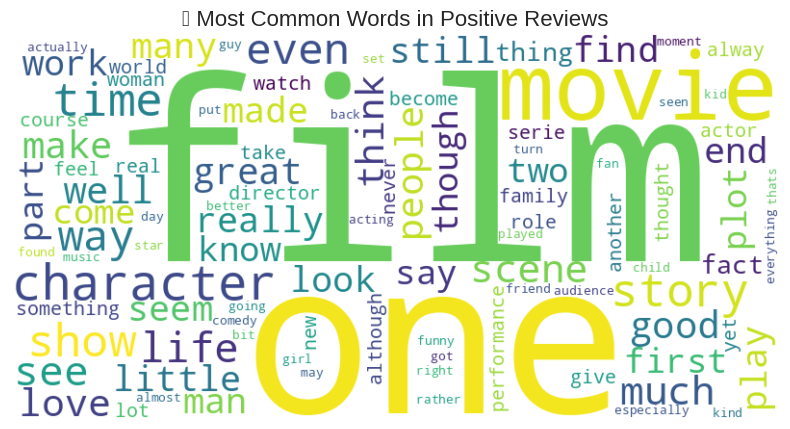

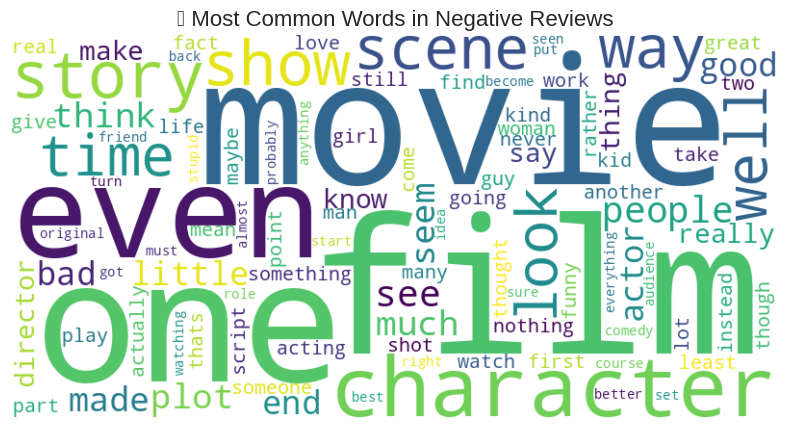

In [ ]:
#wordcloud visualization
def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          max_words=100, colormap='viridis').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.show()

positive_text = ' '.join(df[df['sentiment'] == 'positive']['processed_review'])
create_wordcloud(positive_text, '☀ Most Common Words in Positive Reviews')

negative_text = ' '.join(df[df['sentiment'] == 'negative']['processed_review'])
create_wordcloud(negative_text, '⛈ Most Common Words in Negative Reviews')


In [ ]:
#save the processed dataset
df_processed = df[['processed_review', 'sentiment']].copy()
df_processed.to_csv('processed_reviews.csv', index=False)
print("✅ Saved cleaned data to: processed_reviews.csv")


✅ Saved cleaned data to: processed_reviews.csv


# **PHASE 3: Model Training**

In [ ]:
#install required libraries
!pip install scikit-learn joblib


In [ ]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

print("📊 Phase 3: Model Training & Evaluation")


📊 Phase 3: Model Training & Evaluation


In [ ]:
#load processed dataset
df = pd.read_csv('processed_reviews.csv')
print(f"✅ Loaded {len(df)} processed reviews")


✅ Loaded 50000 processed reviews


In [ ]:
#prepare features and labels
X = df['processed_review']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

print(f"📈 Training set size: {len(X_train)}")
print(f"📉 Test set size: {len(X_test)}")


📈 Training set size: 40000
📉 Test set size: 10000


In [ ]:
#TF-IDF vectorization
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1, 2), min_df=2, max_df=0.95)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("✅ TF-IDF feature extraction completed.")
print(f"🔢 Feature shape: {X_train_tfidf.shape}")





✅ TF-IDF feature extraction completed.
🔢 Feature shape: (40000, 10000)


In [ ]:
#train and compare models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Linear SVM': LinearSVC(dual=False, max_iter=1000, random_state=42)
}

results = {}
trained_models = {}

for name, model in models.items():
    print(f"\n🚀 Training: {name}")
    model.fit(X_train_tfidf, y_train)
    trained_models[name] = model

    cv_scores = cross_val_score(model, X_train_tfidf, y_train, cv=5, scoring='accuracy')
    y_pred = model.predict(X_test_tfidf)
    test_acc = accuracy_score(y_test, y_pred)

    results[name] = {
        'CV Mean': cv_scores.mean(),
        'CV Std': cv_scores.std(),
        'Test Accuracy': test_acc
    }

    print(f"✅ {name} - CV: {cv_scores.mean():.4f} (±{cv_scores.std():.4f}), Test: {test_acc:.4f}")

# Display results
results_df = pd.DataFrame(results).T.sort_values(by='Test Accuracy', ascending=False)
display(results_df)



🚀 Training: Logistic Regression
✅ Logistic Regression - CV: 0.8900 (±0.0039), Test: 0.8924

🚀 Training: Naive Bayes
✅ Naive Bayes - CV: 0.8649 (±0.0025), Test: 0.8665

🚀 Training: Random Forest
✅ Random Forest - CV: 0.8486 (±0.0043), Test: 0.8489

🚀 Training: Linear SVM
✅ Linear SVM - CV: 0.8826 (±0.0034), Test: 0.8842


,CV Mean,CV Std,Test Accuracy
Logistic Regression,0.890025,0.003914,0.8924
Linear SVM,0.882575,0.003386,0.8842
Naive Bayes,0.864900,0.002461,0.8665
Random Forest,0.848550,0.004251,0.8489



🏆 Best Model: Logistic Regression


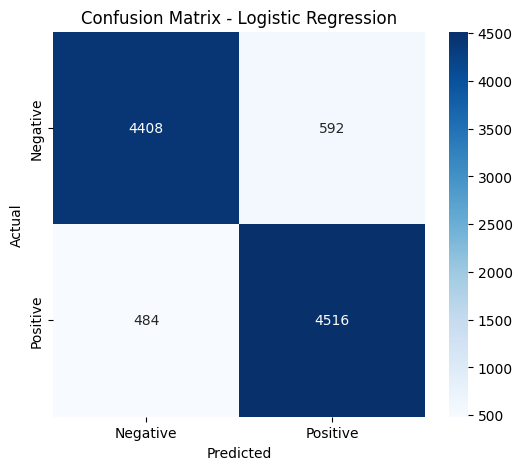


📊 Classification Report:
              precision    recall  f1-score   support

    negative       0.90      0.88      0.89      5000
    positive       0.88      0.90      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [ ]:
#confusion matrix and classification report
# Pick the best model
best_model_name = results_df.index[0]
best_model = trained_models[best_model_name]

print(f"\n🏆 Best Model: {best_model_name}")
y_pred = best_model.predict(X_test_tfidf)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))


In [ ]:
#save best model and vectorizer
joblib.dump(best_model, f'best_model_{best_model_name.lower().replace(" ", "_")}.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

print("✅ Model and vectorizer saved successfully.")


✅ Model and vectorizer saved successfully.


In [ ]:
from google.colab import files

# Adjust filename if needed
files.download('best_model_linear_svm.pkl')
files.download('tfidf_vectorizer.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **PHASE 4: Evaluation and Visualization bold text**

In [ ]:
!pip install joblib seaborn


In [ ]:
joblib.dump(best_model, 'best_model_linear_svm.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.metrics import classification_report, confusion_matrix

# 🔐 Try multiple filenames if you're not sure
try:
    model = joblib.load('best_model_linear_svm.pkl')
    print("✅ Loaded model: best_model_linear_svm.pkl")
except FileNotFoundError:
    try:
        model = joblib.load('best_model_linearsvc.pkl')
        print("✅ Loaded model: best_model_linearsvc.pkl")
    except FileNotFoundError:
        raise FileNotFoundError("❌ Couldn't find the saved model file. Please double-check the Phase 3 save name.")

# Load vectorizer
tfidf = joblib.load('tfidf_vectorizer.pkl')
print("✅ Vectorizer loaded.")


✅ Loaded model: best_model_linear_svm.pkl
✅ Vectorizer loaded.


In [ ]:
#load and transform test data
df = pd.read_csv('processed_reviews.csv')

# Split data
from sklearn.model_selection import train_test_split

X = df['processed_review']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

# Transform test data using saved vectorizer
X_test_tfidf = tfidf.transform(X_test)


In [ ]:
#predict and report
y_pred = model.predict(X_test_tfidf)

# Classification Report
print("📊 Classification Report:")
print(classification_report(y_test, y_pred))


📊 Classification Report:
              precision    recall  f1-score   support

    negative       0.90      0.88      0.89      5000
    positive       0.88      0.90      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



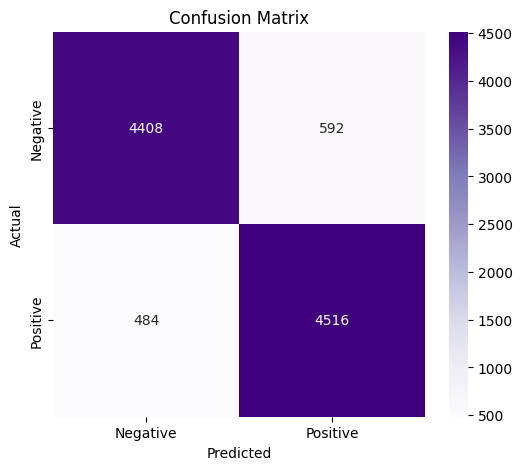

In [ ]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
#feature importance
if hasattr(model, "coef_"):
    feature_names = tfidf.get_feature_names_out()
    coefs = model.coef_[0]

    top_pos = np.argsort(coefs)[-10:]
    top_neg = np.argsort(coefs)[:10]

    print("📈 Top Positive Features:")
    for i in reversed(top_pos):
        print(f"  {feature_names[i]}: {coefs[i]:.4f}")

    print("\n📉 Top Negative Features:")
    for i in top_neg:
        print(f"  {feature_names[i]}: {coefs[i]:.4f}")
else:
    print("⚠️ Feature importance not available for this model type.")


📈 Top Positive Features:
  great: 7.0817
  excellent: 6.5708
  perfect: 5.4943
  amazing: 4.8601
  wonderful: 4.6559
  best: 4.5620
  hilarious: 4.4679
  loved: 4.3118
  favorite: 4.2453
  one best: 4.1047

📉 Top Negative Features:
  worst: -9.1885
  bad: -7.7434
  awful: -7.6422
  waste: -6.9277
  boring: -6.1204
  poor: -5.7520
  terrible: -5.5533
  nothing: -5.4741
  worse: -5.0422
  dull: -5.0040


# **PHASE 5: Interactive Demo**

In [ ]:
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension


Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [ ]:
import pandas as pd
import joblib
from IPython.display import display
import ipywidgets as widgets


In [ ]:
# Load trained model and vectorizer
model = joblib.load('best_model_linear_svm.pkl')  # update if needed
vectorizer = joblib.load('tfidf_vectorizer.pkl')


In [ ]:
#define a clean text function
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def clean_input_text(text):
    text = text.lower()
    text = re.sub(r'<[^>]+>', '', text)
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    return ' '.join(tokens)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#build the widgets and interface
input_box = widgets.Textarea(
    value='I really loved the movie!',
    placeholder='Enter a review here...',
    description='Review:',
    layout=widgets.Layout(width='100%', height='120px'),
    style={'description_width': 'initial'}
)

output = widgets.Output()

def on_text_submit(change):
    with output:
        output.clear_output()
        cleaned = clean_input_text(change['new'])
        transformed = vectorizer.transform([cleaned])
        prediction = model.predict(transformed)[0]
        print(f"\n🎯 Predicted Sentiment: **{prediction.upper()}**")

input_box.observe(on_text_submit, names='value')

display(input_box)
display(output)


Textarea(value='I really loved the movie!', description='Review:', layout=Layout(height='120px', width='100%')…

Output()

In [ ]:
#adding a reset button
def reset_text(_):
    input_box.value = ""

reset_button = widgets.Button(description="Clear Input", button_style='warning')
reset_button.on_click(reset_text)

display(reset_button)


Button(button_style='warning', description='Clear Input', style=ButtonStyle())

In [ ]:
import gradio as gr
import joblib
import numpy as np

# Load model and vectorizer
model = joblib.load("best_model_linear_svm.pkl")
vectorizer = joblib.load("tfidf_vectorizer.pkl")

# Prediction function
def predict_sentiment(review):
    if not review.strip():
        return "⚠️ Please enter a review text!"

    review_vector = vectorizer.transform([review])
    prediction = model.predict(review_vector)[0]

    if prediction == "positive":
        return "✅ Positive Review 😊"
    else:
        return "❌ Negative Review 😞"

# Gradio Interface
examples = [
    "I absolutely loved this movie! The plot was thrilling and the acting was top-notch.",
    "Worst movie ever. Completely boring and a waste of time.",
    "An average film with some good moments but poor ending.",
    "Great storyline but the performance was underwhelming.",
    "I didn’t expect to enjoy it this much. Totally recommended!"
]

with gr.Blocks(theme=gr.themes.Soft()) as demo:
    gr.Markdown(
        "# 🎬 Sentiment Analyzer\n"
        "Enter a movie review and see if it's Positive or Negative."
    )

    with gr.Row():
        with gr.Column():
            review_input = gr.Textbox(label="✍️ Enter your movie review here", lines=5, placeholder="Type or paste review...")
            submit_btn = gr.Button("🔍 Analyze Sentiment")
        with gr.Column():
            output = gr.Textbox(label="📊 Prediction", interactive=False)

    submit_btn.click(fn=predict_sentiment, inputs=review_input, outputs=output)

    gr.Examples(
        examples=examples,
        inputs=review_input,
        outputs=output,
        label="🧪 Try Example Reviews"
    )

demo.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://c72c4e6034d0d5a8dc.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
